### **Chuẩn bị đầy đủ các thư viện**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras, random, math
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2

#NP warning
import warnings
warnings.filterwarnings('ignore')

### **Các hàm bổ trợ cho việc đọc dữ liệu từ tập dataset train**

In [ ]:
import gzip
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np
import torch
def load_data(data_file):
    """loads the data from the gzip pickled files, and converts to numpy arrays"""
    print('loading data ...')
    f = gzip.open(data_file, 'rb')
    train_set, valid_set, test_set = load_pickle(f)
    f.close()

    train_set_x, train_set_y = make_tensor(train_set)
    valid_set_x, valid_set_y = make_tensor(valid_set)
    test_set_x, test_set_y = make_tensor(test_set)

    return [(train_set_x, train_set_y), (valid_set_x, valid_set_y), (test_set_x, test_set_y)]


def make_tensor(data_xy):
    """converts the input to numpy arrays"""
    data_x, data_y = data_xy
    data_x = torch.tensor(data_x)
    data_y = np.asarray(data_y, dtype='int32')
    return data_x, data_y


def load_pickle(f):
    """
    loads and returns the content of a pickled file
    it handles the inconsistencies between the pickle packages available in Python 2 and 3
    """
    try:
        import pickle as thepickle
    except ImportError:
        import pickle as thepickle

    try:
        ret = thepickle.load(f, encoding='latin1')
    except TypeError:
        ret = thepickle.load(f)

    return ret


### **Tải dữ liệu về google colab**
### **Sau đó load vào các biến tương ứng**

In [ ]:
!gdown  https://www2.cs.uic.edu/~vnoroozi/noisy-mnist/noisymnist_view1.gz
!gdown  https://www2.cs.uic.edu/~vnoroozi/noisy-mnist/noisymnist_view2.gz
data1 = load_data('noisymnist_view1.gz')
data2 = load_data('noisymnist_view2.gz')
(x_train, y_train) = data1[0][0], data1[0][1]
(x_val, y_val) = data1[1][0], data1[1][1]
(x_test, y_test) = data1[2][0], data1[2][1]

Downloading...
From: https://www2.cs.uic.edu/~vnoroozi/noisy-mnist/noisymnist_view1.gz
To: /content/noisymnist_view1.gz
100% 88.9M/88.9M [00:06<00:00, 14.5MB/s]
Downloading...
From: https://www2.cs.uic.edu/~vnoroozi/noisy-mnist/noisymnist_view2.gz
To: /content/noisymnist_view2.gz
100% 210M/210M [00:12<00:00, 16.4MB/s]
loading data ...
loading data ...


### **Số ảnh và số chiều của input**

In [ ]:
print('Number of images (digits): ', x_train.shape[0]) 
print('Dimensions of X: ', x_train.shape[1])

Number of images (digits):  50000
Dimensions of X:  784


### **Thiết lập mô hình**

In [ ]:
# 28x28 = 784
model = Sequential([Dense(1024, input_shape=(784,)), 
                       Activation('sigmoid'),
                       Dense(1024),
                       Activation('sigmoid'),
                       Dense(1024),
                       Activation('sigmoid'),
                       Dense(10),
                       Activation('softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Chuyển kết quả thành one_hot_coding**

In [ ]:
from keras.utils import np_utils
y_train_hot = keras.utils.np_utils.to_categorical(y_train, num_classes=10)

In [ ]:
import torch
import tensorflow as tf
np_tensor = x_train.numpy()
x_train = tf.convert_to_tensor(np_tensor)
np_tensor = x_val.numpy()
x_val = tf.convert_to_tensor(np_tensor)
np_tensor = x_test.numpy()
x_test = tf.convert_to_tensor(np_tensor)

### **Train model**

In [ ]:
model.fit(x_train, y_train_hot, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 0.6332 - accuracy: 0.7895
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.2538 - accuracy: 0.9201
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.1698 - accuracy: 0.9457
Epoch 4/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.1268 - accuracy: 0.9592
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.0945 - accuracy: 0.9705
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.0733 - accuracy: 0.9761
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.0567 - accuracy: 0.9811
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.0451 - accuracy: 0.9849
Epoch 9/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.0361 - accuracy: 0.9873
Epoch 10/10
1563/1563 [==============================] - 62s 40m

### **Thực nghiệm trên tập dữ liệu validation**

In [ ]:
prediction_hot = model.predict(x_val)
prediction = []

#convert from one-hot to regular
for line in prediction_hot:
    prediction.append(np.argmax(line))
correct = 0
incorrect = 0

for i in prediction:
    if prediction[i] == y_val[i]:
        correct += 1
    else:
        incorrect += 1
        #print(prediction[i], '!=', y_test[i])

accuracy = correct / y_val.shape[0]

print(correct)
print('Validation Prediction Accuracy: ', accuracy * 100, '%')

10000
Validation Prediction Accuracy:  100.0 %


### **Thực nghiệm trên tập test**

In [ ]:
prediction_hot = model.predict(x_test)
prediction = []

#convert from one-hot to regular
for line in prediction_hot:
    prediction.append(np.argmax(line))
correct = 0
incorrect = 0

for i in prediction:
    if prediction[i] == y_test[i]:
        correct += 1
    else:
        incorrect += 1
        #print(prediction[i], '!=', y_test[i])

accuracy = correct / y_test.shape[0]

print(correct)
print('Test Prediction Accuracy: ', accuracy * 100, '%')

10000
Test Prediction Accuracy:  100.0 %


### **Demo kết quả**

PREDICTION:  1


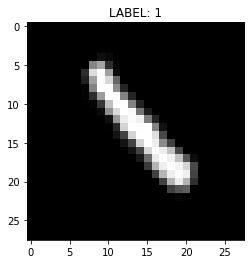

PREDICTION:  6


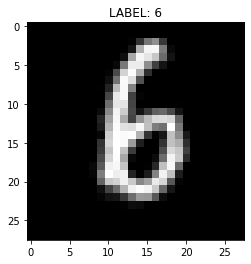

PREDICTION:  4


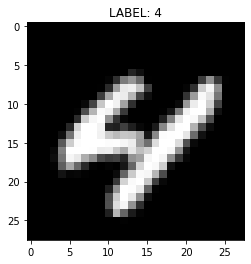

PREDICTION:  7


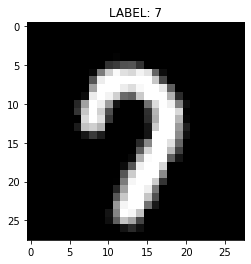

PREDICTION:  1


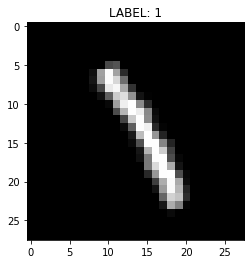

In [ ]:
import matplotlib.pyplot as plt
import keras, random, math
#pick random pictures
num = math.ceil(random.uniform(1,9995))
label = data1[2][1]
for i in range(num, num+5):
    print('PREDICTION: ', label[i])
    plt.title('LABEL: {label}'.format(label=label[i]))
    temp = x_test[i].numpy() 
    temp = np.reshape(temp, (28,28), order='F')
    plt.imshow(temp, cmap='gray')
    plt.show()